In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [45]:
import plotly.express as px

In [13]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
# df.iloc[0,1]

In [7]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [16]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [88]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [90]:
df['Resume'].nunique()

166

In [89]:
df['Resume'].value_counts()

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, maintaina

In [20]:
counts = (df['Category'].value_counts())

In [23]:
index_values = counts.index

In [24]:
values = counts.values

In [27]:
# index_values
# values

### Data Visualisation

In [63]:
plt.rcParams.update({'font.size': 20})

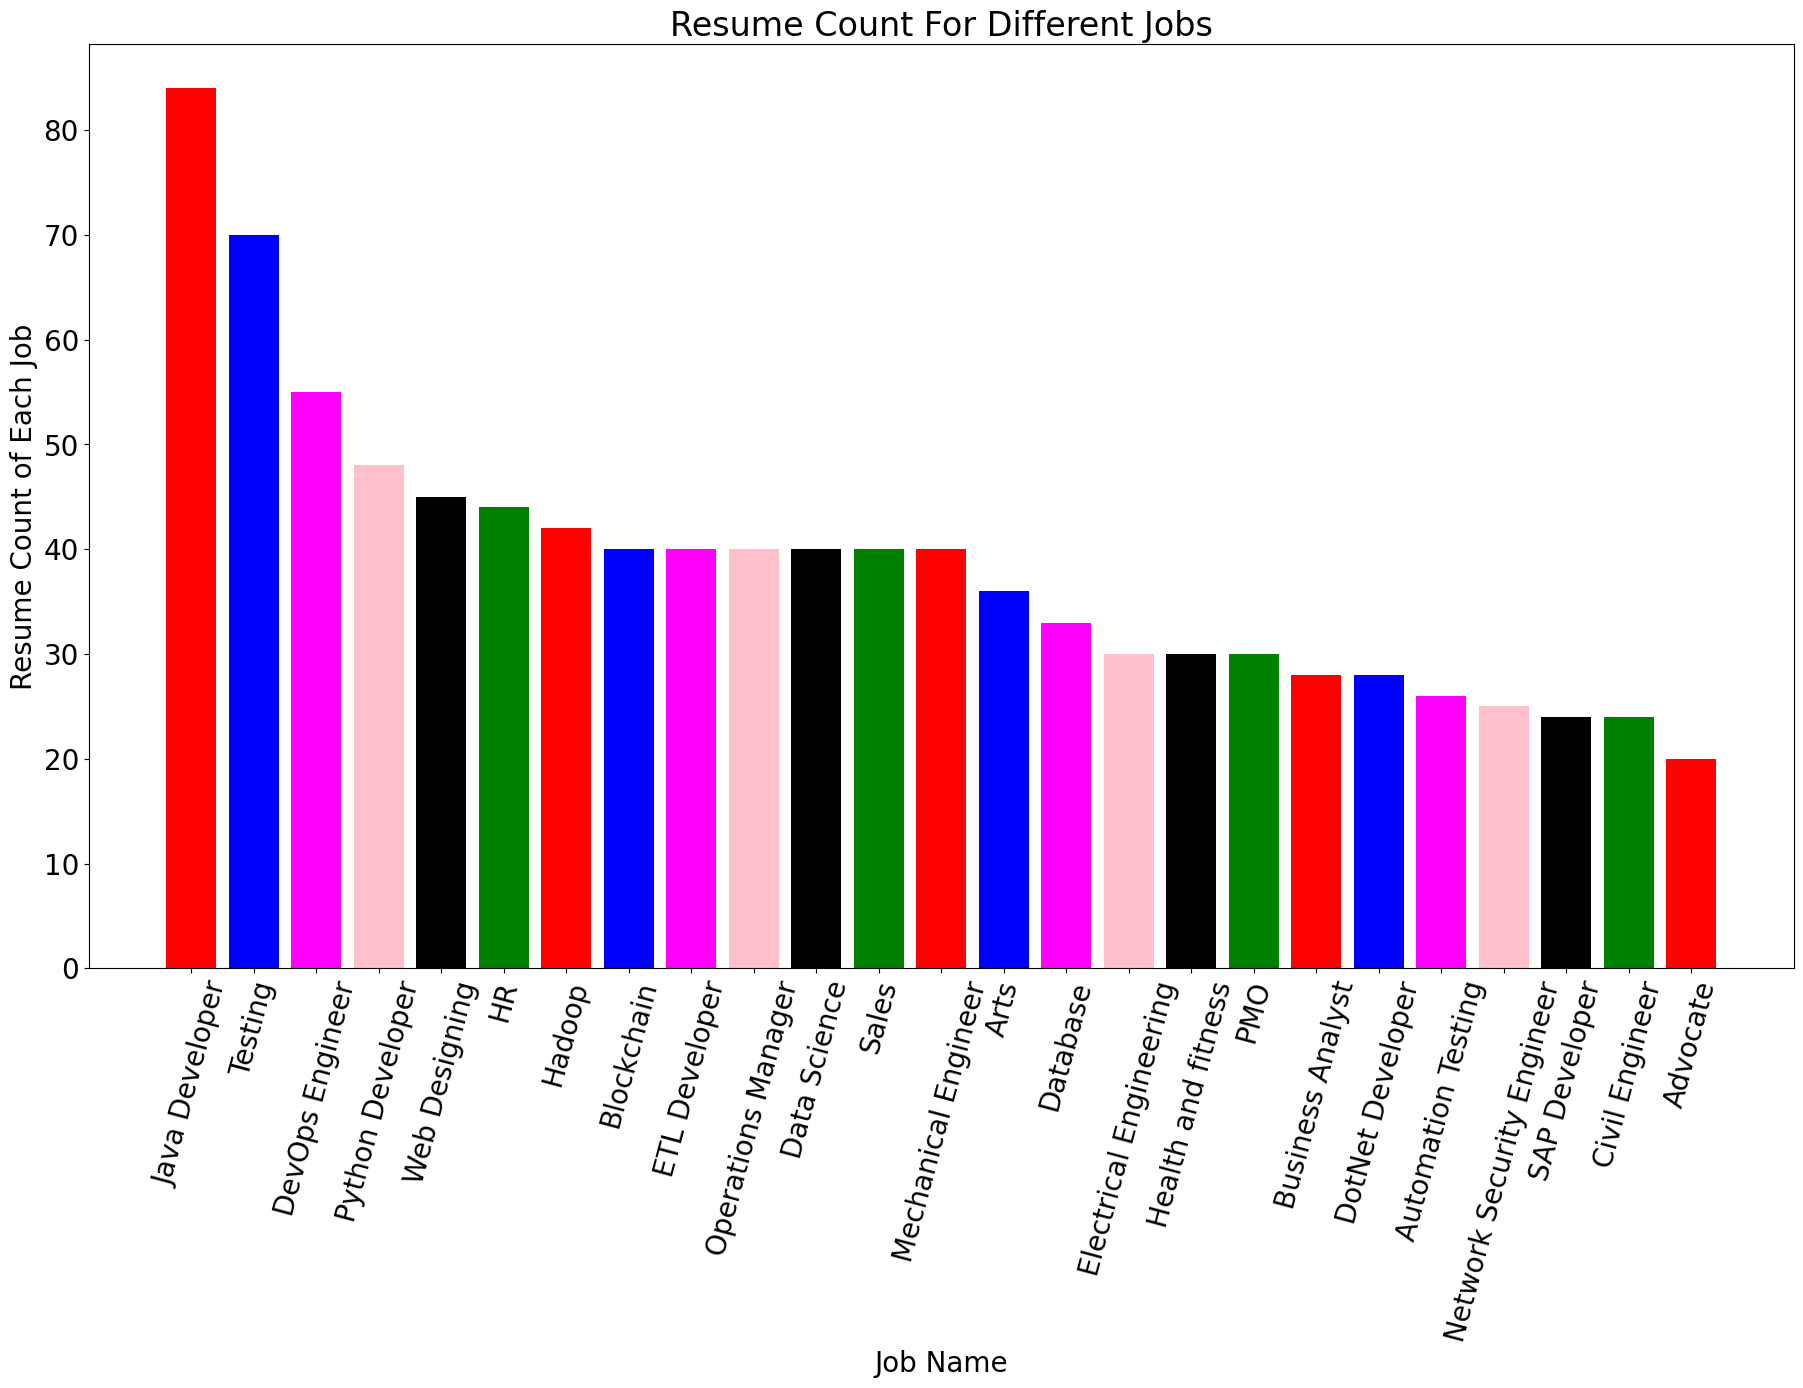

In [67]:
# plt.plot(index_values,values)
fig = plt.figure(figsize=(22,12))
ax = plt.subplot(111)
plt.bar(index_values,values,color=['red','blue','magenta','pink','black','green'])
plt.xticks(rotation=75)
ax.set(xlabel='Job Name', ylabel='Resume Count of Each Job', title='Resume Count For Different Jobs')
plt.show()

In [74]:
plt.rcParams.update({'font.size': 10})

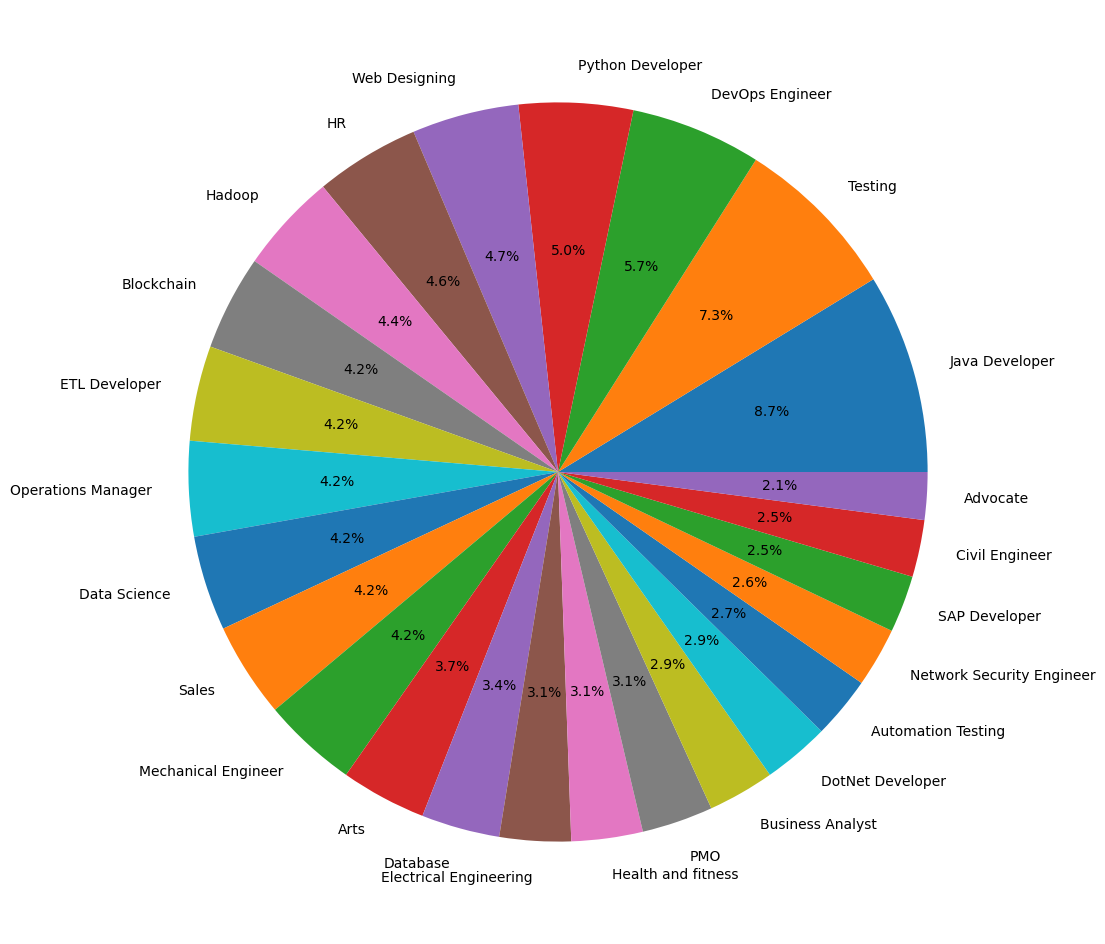

In [85]:
fig = plt.figure(figsize=(15,12))
ax = plt.subplot(111)
plt.pie(x=counts.values,labels=counts.index,autopct='%.1f%%')
plt.savefig('piechart_resume.png')

### Data Preprocessing

In [94]:
# df.head(50)
df.sample(10)

,Category,Resume
619,DevOps Engineer,Software Proficiency: â¢ Languages: Basics of...
545,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
818,ETL Developer,Computer skills: - Yes. SQL knowledge-yes Unix...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
382,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
33,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
913,Testing,â¢ Good logical and analytical skills â¢ Pos...
91,Advocate,Skills Legal Writing Efficient researcher Lega...
181,Web Designing,Education Details \r\n B.C.A Bachelor Computer...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [95]:
def preprocess_text(text_to_clean):
    # Remove URLs
    cleaned_text = re.sub('http\S+\s*', ' ', text_to_clean)
    # Remove RT and cc
    cleaned_text = re.sub('RT|cc', ' ', cleaned_text)
    # Remove hashtags
    cleaned_text = re.sub('#\S+', '', cleaned_text)
    # Remove mentions
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    # Remove punctuations
    cleaned_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)
    # Remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7f]', r' ', cleaned_text)
    # Replace multiple spaces with a single space
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    # Remove leading and trailing whitespaces
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

In [97]:
import re

In [98]:
df['cleaned_resume_details'] = df['Resume'].apply(lambda x : preprocess_text(x))

In [101]:
df.iloc[0,1]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [102]:
df.iloc[0,2]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

### Applying Label Encoder for the Category Column

In [122]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [136]:
# transformer_object = ColumnTransformer(transformers=[('tf1',LabelEncoder(),['Category'])],
#                                        remainder='passthrough')

In [129]:
# np.array(df['Category'])

In [137]:
# transformer_object.fit_transform(df.iloc[0:,0])

In [138]:
label_encoder = LabelEncoder()

In [140]:
category_encoded = label_encoder.fit_transform(df['Category'])

In [141]:
len(category_encoded)

962

In [142]:
df['Transformed_Category'] = category_encoded

In [145]:
df.columns

Index(['Category', 'Resume', 'cleaned_resume_details', 'Transformed_Category'], dtype='object')

In [146]:
df2 = df[['cleaned_resume_details','Transformed_Category']]

In [148]:
df2.sample(5)

,cleaned_resume_details,Transformed_Category
495,Education Details January 2012 to January 2013...,11
253,IT Skills MS Office Photoshop SQL Server Educa...,22
248,IT Skills MS Office Photoshop SQL Server Educa...,22
518,Education Details August 2000 B E Electronics ...,18
609,Skills VISA B1 VISA USA Onsite Visits to Swede...,8


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['cleaned_resume_details'].values
requiredTarget = df['Category'].values

In [106]:
df.shape

(962, 3)

In [109]:
type(requiredText)

numpy.ndarray

In [108]:
requiredText.dtype

dtype('O')

In [105]:
len(requiredText)

962

In [110]:
type(requiredTarget)

numpy.ndarray

In [112]:
# requiredTarget

In [113]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [169]:
feature_names = word_vectorizer.get_feature_names_out()

In [159]:
len(word_vectorizer.get_feature_names_out())

7351

In [ ]:
feature_names = tf.get_feature_names()

In [160]:
doc = 0
feature_index = WordFeatures[doc,:].nonzero()[1]

In [161]:
tfidf_scores = zip(feature_index, [WordFeatures[doc, x] for x in feature_index])

In [163]:
# tfidf_scores

In [170]:
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
      print(w, s)

words 0.09054194474658708
word2vec 0.05901636533425517
word 0.0671174150548629
visualizations 0.09992339257258985
vision 0.04181705520237126
vehicle 0.04643183419927338
ve 0.08733911322267127
various 0.019637094364393735
vader 0.05901636533425517
using 0.018887012833335267
user 0.050387636670751676
used 0.02405607482490523
usa 0.0334886388626349
unstructured 0.05347553112107107
understanding 0.027471268153022293
understand 0.029708467825895302
trivial 0.05901636533425517
trees 0.05901636533425517
topic 0.12389693304014394
tools 0.04933752996212628
tool 0.0704950032736423
time 0.03754899576311922
tfidf 0.05901636533425517
text 0.08772381070459523
terms 0.04067303403145448
technology 0.031314292639788396
technologies 0.04806461393511312
techniques 0.034274644566994944
team 0.015055955160507326
targeted 0.04866017843932038
tar 0.09992339257258985
tag 0.05158388722815409
tableau 0.0884064602484037
systems 0.03349518263812031
synthesizes 0.05901636533425517
svm 0.05347553112107107
survey 0.

In [151]:
WordFeatures.shape

(962, 7351)

In [150]:
df.shape

(962, 4)

In [149]:
df.columns

Index(['Category', 'Resume', 'cleaned_resume_details', 'Transformed_Category'], dtype='object')

In [120]:
type(WordFeatures)

scipy.sparse._csr.csr_matrix

In [152]:
df3 = pd.DataFrame()

In [154]:
df3['transformed_details'] = WordFeatures.shape[0]

In [156]:
# df3

In [157]:
WordFeatures

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [171]:
df.columns

Index(['Category', 'Resume', 'cleaned_resume_details', 'Transformed_Category'], dtype='object')

In [172]:
df.head()

,Category,Resume,cleaned_resume_details,Transformed_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


### Train - Test Split

In [173]:
X = WordFeatures
y = df['Transformed_Category']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [177]:
# y_test

In [179]:
X_train.shape

(769, 7351)

In [180]:
X_test.shape

(193, 7351)

### Training the Model

In [182]:
multiclass_classifier = LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [183]:
multiclass_classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [188]:
# y_train.nunique()

In [187]:
# df['Category'].nunique()

In [189]:
y_pred = multiclass_classifier.predict(X_test)

In [190]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 23,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [192]:
np.array(y_test)

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20,  8,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [196]:
multiclass_classifier.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [199]:
df[df['Transformed_Category']==24]

,Category,Resume,cleaned_resume_details,Transformed_Category
140,Web Designing,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,24
141,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,Education Details B C A Bachelor Computer Appl...,24
142,Web Designing,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,24
143,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,Education Details January 2016 B Sc Informatio...,24
144,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W...",IT SKILLS Languages C Basic JAVA Basic Web Tec...,24
145,Web Designing,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,24
146,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,Education Details B C A Bachelor Computer Appl...,24
147,Web Designing,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,24
148,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,Education Details January 2016 B Sc Informatio...,24
149,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W...",IT SKILLS Languages C Basic JAVA Basic Web Tec...,24


In [193]:
accuracy_score(y_test,y_pred)

0.9948186528497409

In [202]:
y_test[y_test==24]

165    24
168    24
158    24
174    24
141    24
Name: Transformed_Category, dtype: int64

In [195]:
confusion_matrix(y_test,y_pred)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0, 

### User Query